## Description
This routine is part of the cosmoGW code (https://github.com/AlbertoRoper/cosmoGW).
It reads the run variables from the Pencil Code simulations and reproduces the results presented in
* A. Roper Pol, S. Mandal, A. Brandenburg, T. Kahniashvili, and A. Kosowsky, "Numerical simulations of gravitational waves from early-universe turbulence," Phys. Rev. D 102, 083512 (2020), [arXiv:1903.08585](https://arxiv.org/abs/1903.08585).
            
The data is published and publicly available in
* A. Roper Pol, S. Mandal, A. Brandenburg, T. Kahniashvili, and A. Kosowsky, Datasets for *“Numerical simulations of gravitational waves from early-universe turbulence”* (v2020.02.28), [Zenodo](https://doi.org/10.5281/zenodo.3692072).
       
#### Name of the runs:
* ini1: M1152e_exp6k4_M4b
* ini2: M1152e_exp6k4
* ini3: M1152e_exp6k4_k60b
* hel1: F1152d2_sig1_t11_M2c_double
* hel2: F1152a_sig1_t11d_double
* hel3: F1152a_sig1
* hel4: F1152a_k10_sig1
* noh1: F1152b_sig0_t11_M4
* noh2: F1152a_sig0_t11b
* ac1: E1152e_t11_M4d_double
* ac2: E1152e_t11_M4a_double
* ac3: E1152e_t11_M4e_double

In [1]:
%load_ext autoreload
%autoreload 2

import results_PRD_1903_08585 as res
import run as r

print(res.__doc__)


results_PRD_1903_08585.py is a Python routine that reads the data, computes
the averaged spectra using the specific time indices for each run at which
the GW spectrum reaches its stationary regime (added by hand), and stores the
resulting run variables as pickle files.

It can be used to generate the plots and results of the numerical simulations
of A. Roper Pol, S. Mandal, A. Brandenburg, T. Kahniashvili, and A. Kosowsky,
"Numerical simulations of gravitational waves from early-universe turbulence,"
Phys. Rev. D 102, 083512 (2020), https://arxiv.org/abs/1903.08585.

Author: Alberto Roper Pol
Created: 01/11/2021
Updated: 20/07/2023 (new release of the cosmoGW code)



In [3]:
# read the results of the Pencil Code runs
# ONLY NEEDS TO BE DONE ONCE! since after reading the files, the function generates
# a pickle variable for each run with the relevant information that can later be loaded
# for faster executions

##  AFTER DONE ONCE, SET read to FALSE
read = True

# set quiet to False for additional output while reading
runs = r.initialize_runs(quiet=True, load=not read,
                         char=read, project='PRD_1903_08585')

if read:
    
    ## These old runs had an error in the normalization that was later detected so
    ## we correct this factor:
    res.correct_ini1_3(runs)
    
    # computes the average and maximum spectra over time and
    # uses the indices of the time array after which the spectra are no
    # longer growing but just oscillating (the specific indices have to be
    # studied separately and one by one for all the runs).
    res.compute_aver_spec(runs)
    
    # save the variables runs now to avoid repeating the
    # computation of the averaged and maximum spectra
    r.save_runs(runs)


 dirs is being set up for project:  PRD_1903_08585

 {'ini1': 'M1152e_exp6k4_M4b', 'ini2': 'M1152e_exp6k4', 'ini3': 'M1152e_exp6k4_k60b', 'hel1': 'F1152d2_sig1_t11_M2c_double', 'hel2': 'F1152a_sig1_t11d_double', 'hel3': 'F1152a_sig1', 'hel4': 'F1152a_k10_sig1', 'noh1': 'F1152b_sig0_t11_M4', 'noh2': 'F1152a_sig0_t11b', 'ac1': 'E1152e_t11_M4d_double', 'ac2': 'E1152e_t11_M4a_double', 'ac3': 'E1152e_t11_M4e_double'} 

Reading files from the simulations
Reading run ini1

k0 =  99.99999852271725
assigning k
Reading files from the simulations
Reading run ini2

k0 =  99.99999852271725
assigning k
Reading files from the simulations
Reading run ini3

k0 =  9.999999852271726
assigning k
Reading files from the simulations
Reading run hel1

k0 =  99.99999852271725
assigning k
Reading files from the simulations
Reading run hel2

k0 =  99.99999852271725
assigning k
Reading files from the simulations
Reading run hel3

k0 =  99.9999948621538
assigning k
Reading files from the simulations
Reading run h


 results_PRD_1903_08585.plot_EGW_EM_vs_k 
 
    Function that generates the plot of the magnetic spectrum
    EM (k) = Omega_M(k)/k at the initial time of turbulence generation
    and the GW spectrum EGW (k) = Omega_GW(k)/k, averaged over oscillations
    in time.

    It corresponds to figure 1 of A. Roper Pol, S. Mandal, A. Brandenburg,
    T. Kahniashvili, and A. Kosowsky, "Numerical simulations of gravitational
    waves from early-universe turbulence," Phys. Rev. D 102, 083512 (2020),
    https://arxiv.org/abs/1903.08585.

    Arguments:
        runs -- dictionary that includes the run variables
        rr -- string that selects which run to plot (default 'ini2')
        save -- option to save the resulting figure as
                plots/EGW_EM_vs_k_'name_run'.pdf' (default True)
        show -- option to show the resulting figure (default True)
    


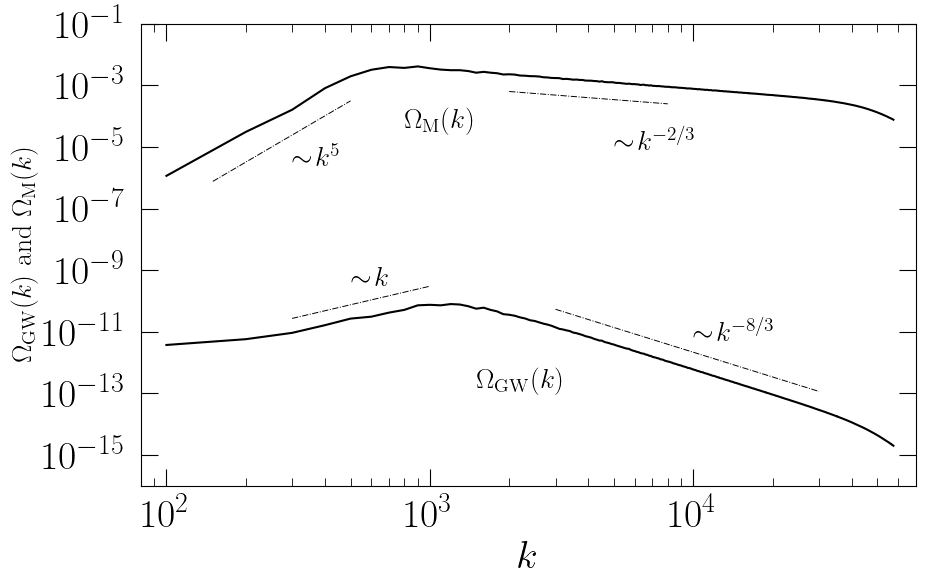

In [5]:
print('\n', 'results_PRD_1903_08585.plot_EGW_EM_vs_k \n', res.plot_EGW_EM_vs_k.__doc__)
res.plot_EGW_EM_vs_k(runs, rr='ini2', save=True)
import matplotlib.pyplot as plt
import numpy as np


 results_PRD_1903_08585.plot_EGW_vs_kt 
 
    Function that generates the plot of the compensated GW spectrum as a
    function of k(t - tini) for the smallest wave numbers of the run.

    It corresponds to figure 3 of A. Roper Pol, S. Mandal, A. Brandenburg,
    T. Kahniashvili, and A. Kosowsky, "Numerical simulations of gravitational
    waves from early-universe turbulence," Phys. Rev. D 102, 083512 (2020),
    https://arxiv.org/abs/1903.08585.

    Arguments:
        runs -- dictionary that includes the run variables
        rr -- string that selects which run to plot (default 'ini2')
        save -- option to save the resulting figure as
                plots/EGW_vs_kt_'name_run'.pdf (default True)
        show -- option to show the resulting figure (default True)
        k0 -- lowest wave number (used to show 10 instead of 9 in the plot)
    


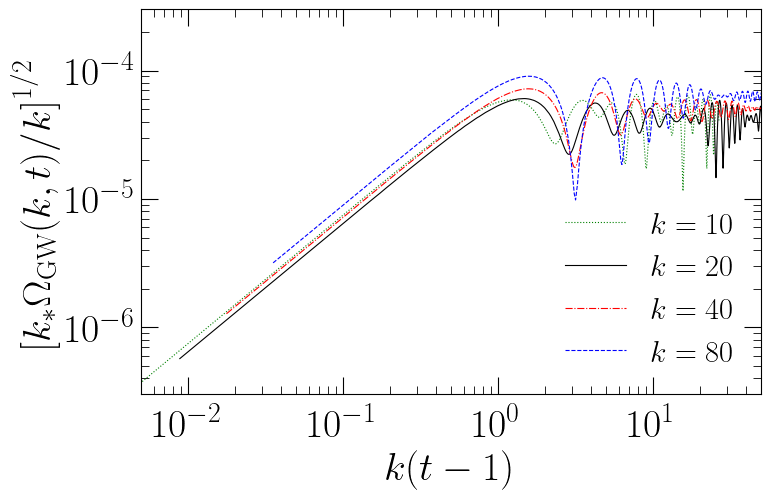

In [6]:
print('\n results_PRD_1903_08585.plot_EGW_vs_kt \n', res.plot_EGW_vs_kt.__doc__)
res.plot_EGW_vs_kt(runs, rr='ini3', save=True, k0=10)
import matplotlib.pyplot as plt


    Function that generates the plot of the GW energy density spectrum
    of initial runs (ini1, ini2, and ini3), compared to the LISA sensitivity
    and power law sensitivity (PLS).

    It corresponds to figure 4 of A. Roper Pol, S. Mandal, A. Brandenburg,
    T. Kahniashvili, and A. Kosowsky, "Numerical simulations of gravitational
    waves from early-universe turbulence," Phys. Rev. D 102, 083512 (2020),
    https://arxiv.org/abs/1903.08585.

    Arguments:
        runs -- dictionary that includes the run variables
        T -- temperature scale (in natural units) at the time of turbulence
             generation (default 100 GeV, i.e., electroweak scale)
        g -- number of relativistic degrees of freedom at the time of
             turbulence generation (default 100, i.e., electroweak scale)
        SNR -- signal-to-noise ratio (SNR) of the resulting PLS (default 10)
        Td -- duration of the mission (in years) of the resulting PLS
             (default 4)
        save

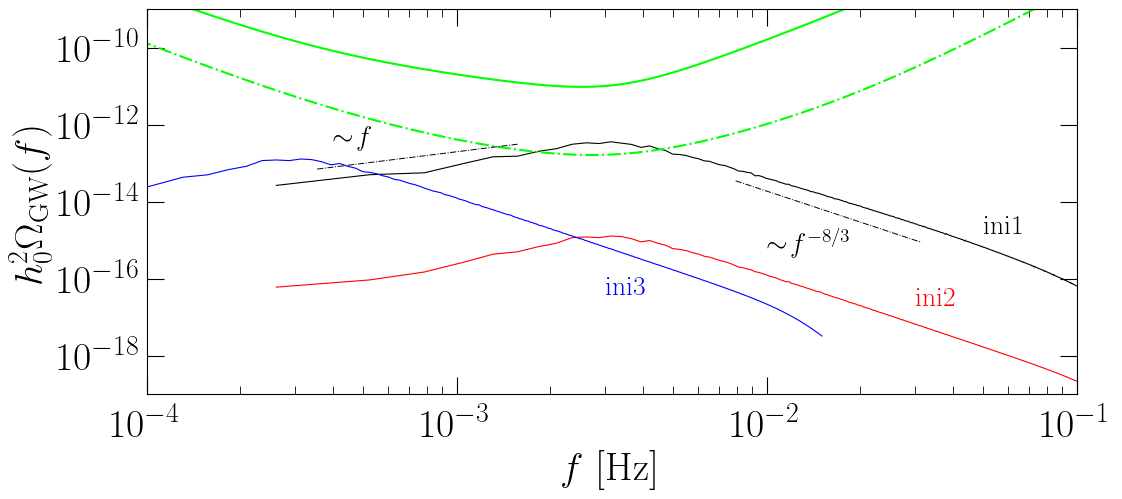

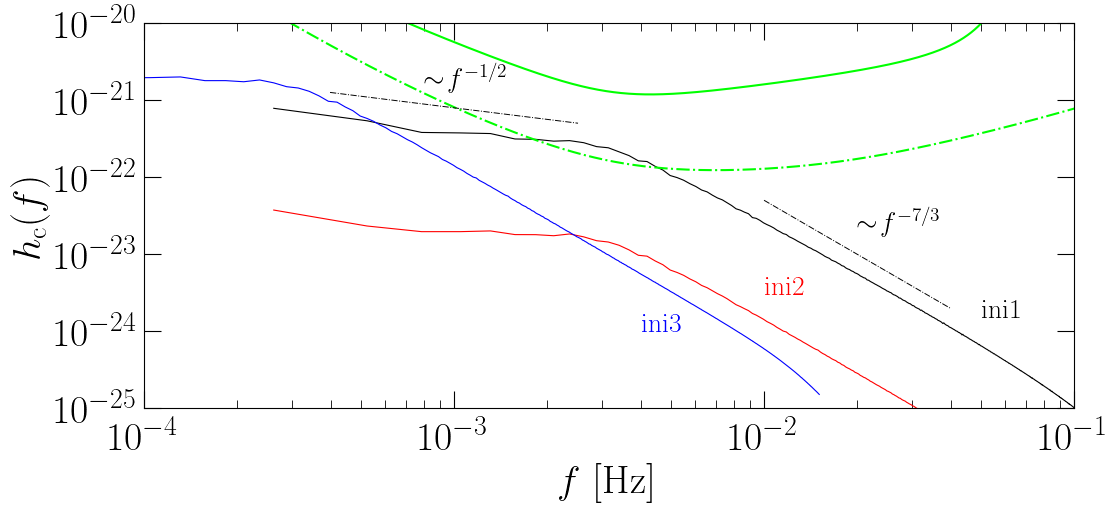

In [16]:
print(res.plot_OmGW_hc_vs_f_ini.__doc__)
res.plot_OmGW_hc_vs_f_ini(runs, Td=4, SNR=10)


    Function that generates the plots of the total magnetic/kinetic energy
    density as a function of time ('OmM_vs_t.pdf') and the GW energy density
    as a function of time ('OmGW_vs_t.pdf').

    It corresponds to figure 5 of A. Roper Pol, S. Mandal, A. Brandenburg,
    T. Kahniashvili, and A. Kosowsky, "Numerical simulations of gravitational
    waves from early-universe turbulence," Phys. Rev. D 102, 083512 (2020),
    https://arxiv.org/abs/1903.08585.

    Arguments:
        runs -- dictionary that includes the run variables
        save -- option to save the resulting figure as
                plots/OmGW_vs_t.pdf (default True)
        show -- option to show the resulting figure (default True)
    


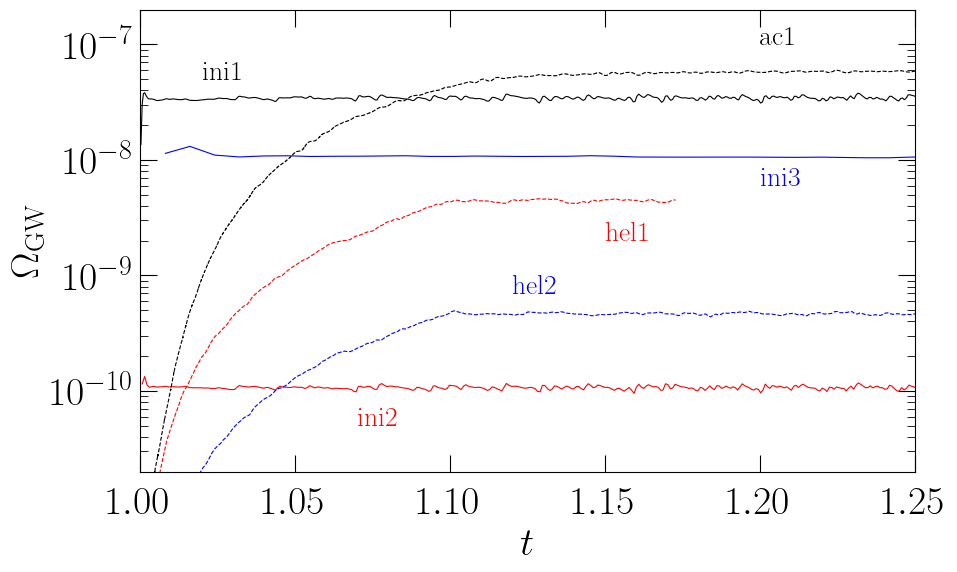

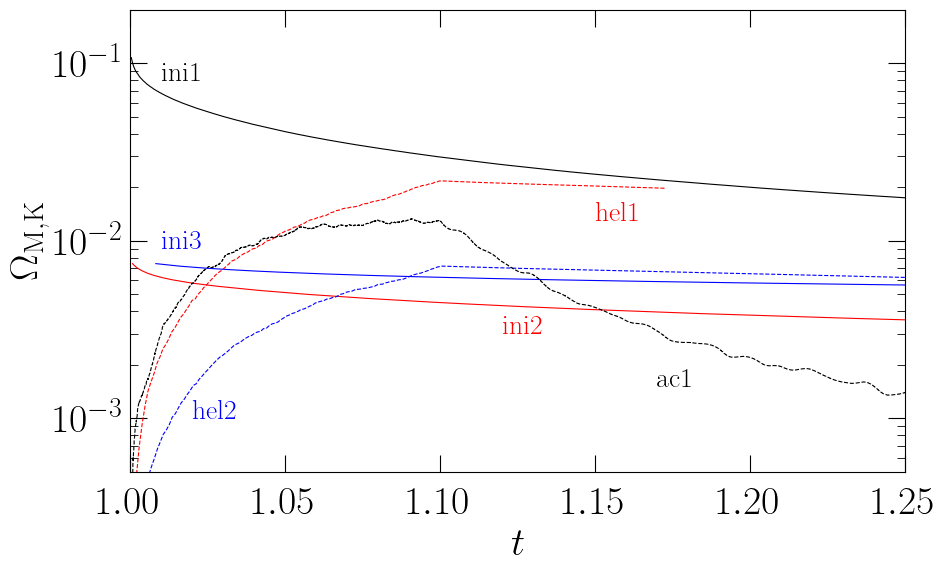

In [23]:
print(res.plot_OmMK_OmGW_vs_t.__doc__)
res.plot_OmMK_OmGW_vs_t(runs, save=True)


    Function that generates the plot of the GW energy density spectrum
    of some of the initially driven runs (ac1, hel1, hel2, hel3, and noh1),
    compared to the LISA sensitivity and power law sensitivity (PLS).

    It corresponds to figure 6 of A. Roper Pol, S. Mandal, A. Brandenburg,
    T. Kahniashvili, and A. Kosowsky, "Numerical simulations of gravitational
    waves from early-universe turbulence," Phys. Rev. D 102, 083512 (2020),
    https://arxiv.org/abs/1903.08585.

    Arguments:
        runs -- dictionary that includes the run variables
        T -- temperature scale (in natural units) at the time of turbulence
             generation (default 100 GeV, i.e., electroweak scale)
        g -- number of relativistic degrees of freedom at the time of
             turbulence generation (default 100, i.e., electroweak scale)
        SNR -- signal-to-noise ratio (SNR) of the resulting PLS (default 10)
        Td -- duration of the mission (in years) of the resulting PLS
     

/Users/albertoroperpol/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/albertoroperpol/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


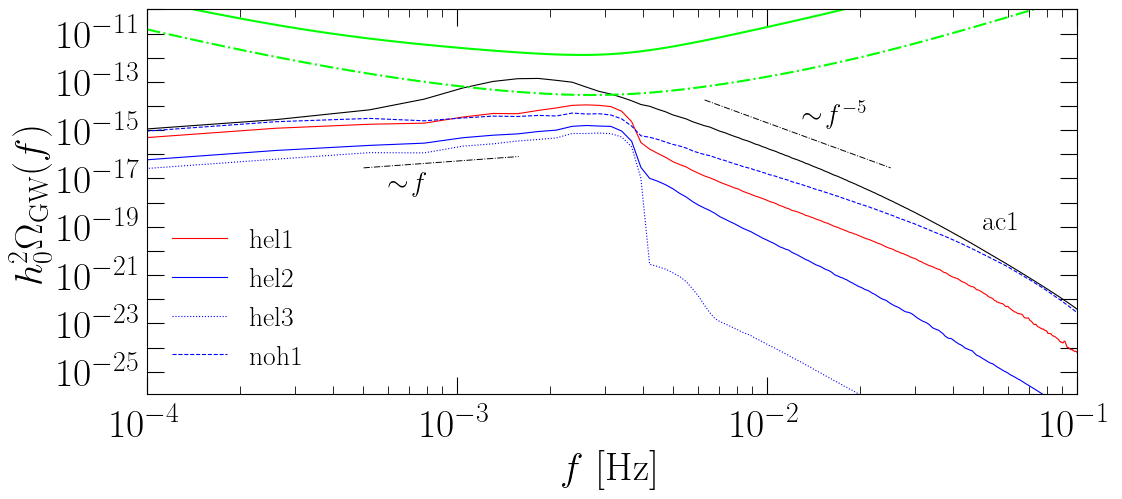

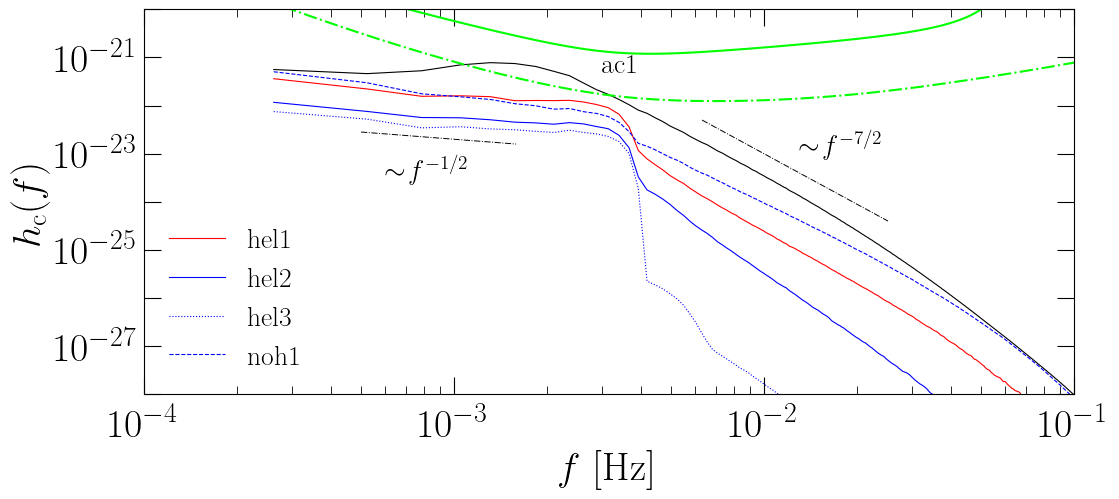

In [24]:
print(res.plot_OmGW_hc_vs_f_driven.__doc__)
res.plot_OmGW_hc_vs_f_driven(runs)


    Function that generates the plot of the total (saturated) GW energy
    density integrated over wave numbers as a function of the
    magnetic/kinetic energy density.

    It corresponds to figure 7 of A. Roper Pol, S. Mandal, A. Brandenburg,
    T. Kahniashvili, and A. Kosowsky, "Numerical simulations of gravitational
    waves from early-universe turbulence," Phys. Rev. D 102, 083512 (2020),
    https://arxiv.org/abs/1903.08585.

    Arguments:
        runs -- dictionary that includes the run variables
        save -- option to save the resulting figure as
                plots/OmGW_vs_OmMK.pdf (default True)
        show -- option to show the resulting figure (default True)
    


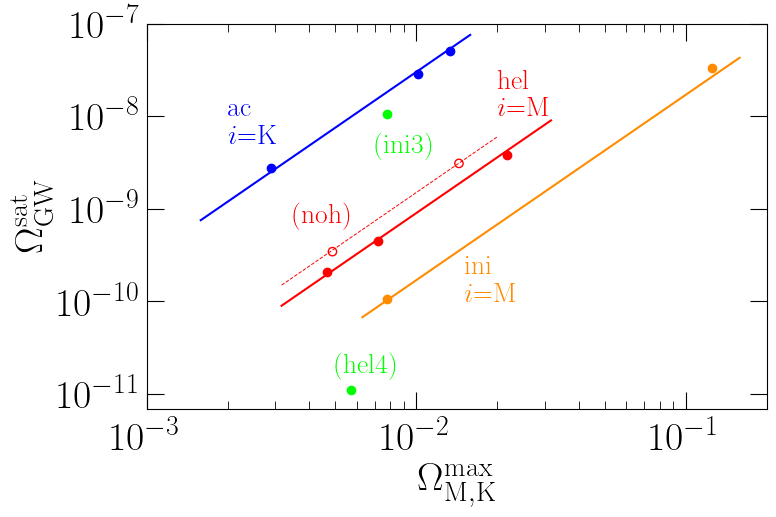

In [28]:
print(res.plot_OmGW_vs_OmMK.__doc__)
res.plot_OmGW_vs_OmMK(runs, save=True)


    Function that generates the plot of the amplitudes of the GW energy
    density at the first time step, to show the evolution from k^2 to k^0
    slopes.

    It corresponds to a plot generated for a presentation, related to the
    work A. Roper Pol, S. Mandal, A. Brandenburg, T. Kahniashvili,
    and A. Kosowsky, "Numerical simulations of gravitational waves from
    early-universe turbulence," Phys. Rev. D 102, 083512 (2020),
    https://arxiv.org/abs/1903.08585.

    Arguments:
        runs -- dictionary that includes the run variables
        rr -- string that selects which run to plot (default 'ini2')
        save -- option to save the resulting figure as
                plots/EGW_vs_k_initial_ts.pdf (default True)
        show -- option to show the resulting figure (default True)
    


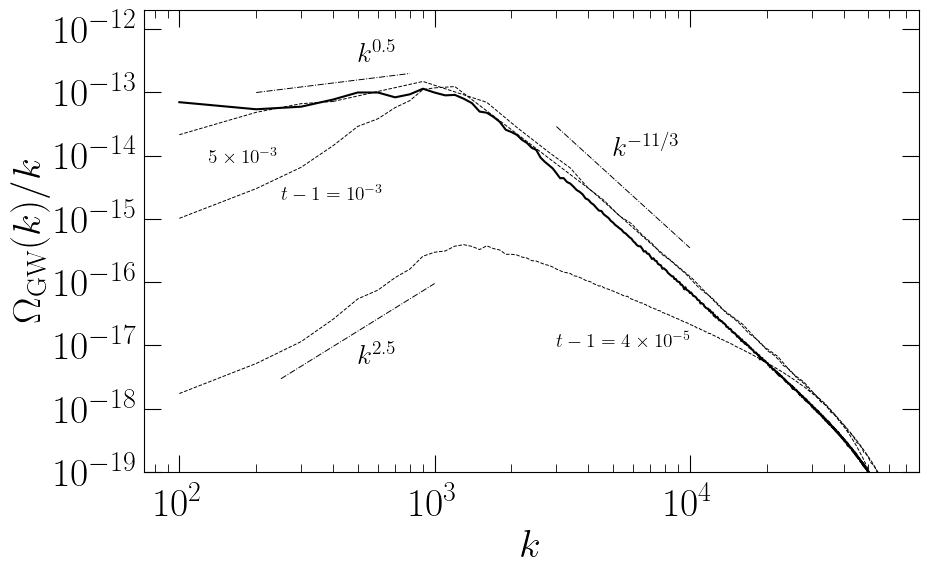

In [35]:
print(res.plot_EGW_vs_k_initial_ts.__doc__)
res.plot_EGW_vs_k_initial_ts(runs, save=True)


    Function that generates the plot of the total GW energy density
    compensated by EM^2/kf^2 (efficiency).

    It corresponds to the runs presented in A. Roper Pol, S. Mandal,
    A. Brandenburg, T. Kahniashvili, and A. Kosowsky, "Numerical simulations of gravitational waves from
    early-universe turbulence," Phys. Rev. D 102, 083512 (2020),
    https://arxiv.org/abs/1903.08585.

    This plot is analogous to figure 10 of A. Roper Pol, S. Mandal,
    A. Brandenburg, and T. Kahniashvili, "Polarization of gravitational waves
    from helical MHD turbulent sources", JCAP 04 (2022), 019,
    https://arxiv.org/abs/2107.05356.

    Arguments:
        runs -- dictionary that includes the run variables
        save -- option to save the resulting figure as plots/efficiency.pdf
                or plots/efficiency_sqrt.pdf (if sqrt = True) (default True)
        show -- option to show the resulting figure (default True)
        sqrt -- option to plot the efficiency defined as the square 

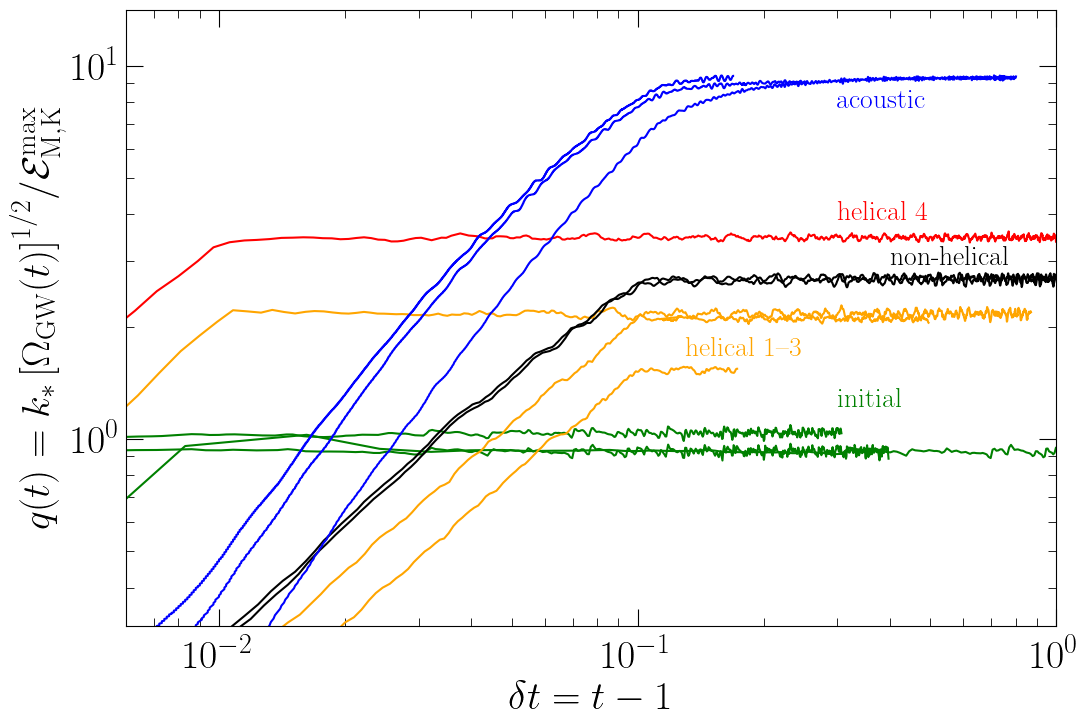

In [38]:
print(res.plot_efficiency.__doc__)
res.plot_efficiency(runs, save=True, sqrt=True)